In [56]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df = pd.read_csv('/content/drive/MyDrive/2222.SR.csv', index_col='Date', parse_dates=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-26,35.900002,35.900002,34.900002,35.099998,35.099998,6273323
2022-10-27,35.099998,35.599998,34.700001,34.700001,34.700001,13767193
2022-10-30,35.150002,35.150002,34.700001,34.750000,34.750000,2821008
2022-10-31,34.750000,34.750000,34.750000,34.750000,34.750000,0
2022-11-01,35.000000,35.200001,34.549999,34.849998,34.849998,5230540


In [59]:
#check missing data
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

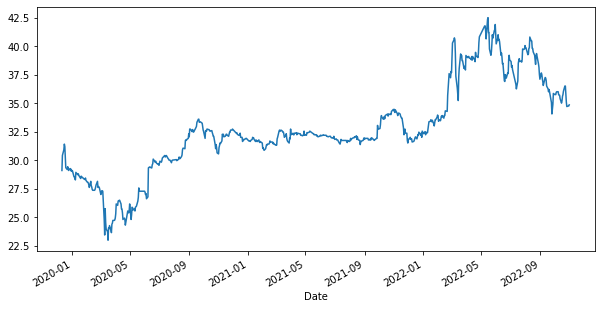

In [60]:
# plot Close Price
plt.figure(figsize=(10,5))
df['Close'].plot()

In [61]:
# Filter data and create Training data
data = df.filter(['Close'])

dataset = data.values

training_data_len = int(np.ceil( len(dataset) * 0.95 ))

training_data_len

687

In [63]:
#Create a new dataframe with only the 'Close column'
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data.shape

(723, 1)

In [64]:
training_data_len


687

In [30]:
# Create the training data set 
# Create the scaled training data set

train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):

  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.31322748, 0.38095239, 0.40634918, 0.43174607, 0.42116403,
       0.37671957, 0.3259259 , 0.3174603 , 0.33015877, 0.32169318,
       0.31322748, 0.31957674, 0.32169318, 0.31111104, 0.31534392,
       0.30899476, 0.31111104, 0.28571431, 0.28359787, 0.27724871,
       0.27089945, 0.30476188, 0.29629629, 0.29417985, 0.29841273,
       0.29206347, 0.28783069, 0.27724871, 0.28783069, 0.28571431,
       0.28148143, 0.28148143, 0.27513228, 0.27301584, 0.27301584,
       0.2793651 , 0.26878312, 0.26031752, 0.26031752, 0.25608465,
       0.24761905, 0.23703707, 0.26455024, 0.24550267, 0.23915351,
       0.22857148, 0.2243386 , 0.2243386 , 0.2243386 , 0.22857148,
       0.23703707, 0.24761905, 0.26455024, 0.23703707, 0.24126979,
       0.23915351, 0.23492063, 0.20529103, 0.21164018, 0.22222222])]
[0.22222221653145224]

[array([0.31322748, 0.38095239, 0.40634918, 0.43174607, 0.42116403,
       0.37671957, 0.3259259 , 0.3174603 , 0.33015877, 0.32169318,
       0.31322748, 0.31957674, 0.32

In [32]:
train_data.shape

(687, 1)

In [33]:
x_train.shape

(627, 60, 1)

In [34]:
#Import libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [35]:
# Create LSTM model
model = Sequential()

model.add(LSTM(200, return_sequences=True,
               input_shape=(x_train.shape[1], 1) ))

model.add(LSTM(128, return_sequences=False))
model.add(Dense(64))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')



In [36]:
#fit the model 
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
627/627 [==============================] - 61s 91ms/step - loss: 0.0053
Epoch 2/10
627/627 [==============================] - 56s 90ms/step - loss: 0.0019
Epoch 3/10
627/627 [==============================] - 50s 79ms/step - loss: 0.0019
Epoch 4/10
627/627 [==============================] - 52s 82ms/step - loss: 0.0013
Epoch 5/10
627/627 [==============================] - 47s 75ms/step - loss: 0.0011
Epoch 6/10
627/627 [==============================] - 57s 91ms/step - loss: 9.6453e-04
Epoch 7/10
627/627 [==============================] - 48s 76ms/step - loss: 9.7335e-04
Epoch 8/10
627/627 [==============================] - 43s 69ms/step - loss: 0.0010
Epoch 9/10
627/627 [==============================] - 43s 68ms/step - loss: 0.0010
Epoch 10/10
627/627 [==============================] - 43s 69ms/step - loss: 9.2383e-04


In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 200)           161600    
                                                                 
 lstm_5 (LSTM)               (None, 128)               168448    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 338,369
Trainable params: 338,369
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Create the testing data set
 
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

#predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse



2/2 [==============================] - 1s 41ms/step


0.5956842935769958

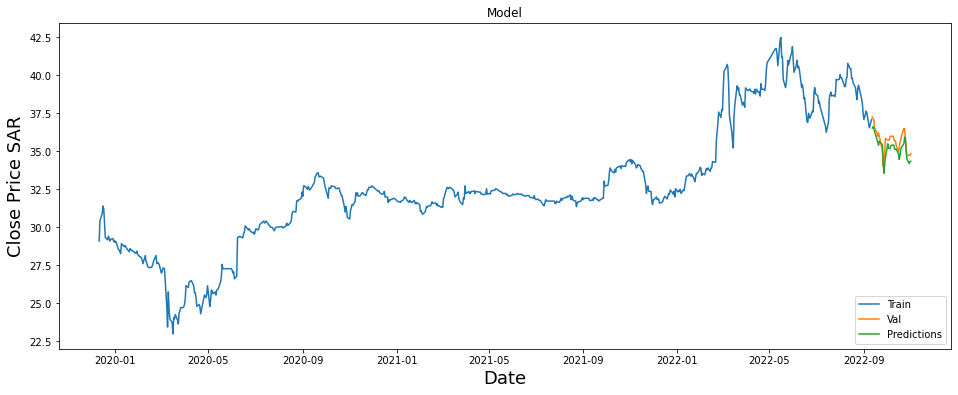

In [65]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price SAR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
#Plot'Close
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
valid.tail()

,Close,Predictions
Date,,
2022-10-26,35.099998,35.042423
2022-10-27,34.700001,34.476845
2022-10-30,34.750000,34.190979
2022-10-31,34.750000,34.330063
2022-11-01,34.849998,34.346806


In [50]:
new_df = df.filter(['Close'])

# Get the last 60 day closing price values and convert the dataframe to array
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)


1/1 [==============================] - 0s 27ms/step


In [53]:
print('Predicting closing price for day 11-02-2022', np.round(pred_price, 2))
print('Actual Closing Price for day 11-02-2022 {34.40}')

Predicting closing price for day 11-02-2022 [[34.44]]
Actual Closing Price for day 11-02-2022 {34.40}
